# <span style="color: Teal; font-weight: bold">What Drives the Prices of Video Games? (EDA)</span>

## <span style="color: Teal; font-weight: bold"> CRISP-DM Framework</span>

<span style="color: Teal; text-decoration: underline">**Determine Business Objectives:**</span> Video games are now <a href="https://www.forbes.com/sites/forbesagencycouncil/2023/11/17/the-gaming-industry-a-behemoth-with-unprecedented-global-reach/">one of the largest enterainment industries in the world</a>, and Steam is one of the largest platforms for the distribution and hosting of personal computer (PC) games, and has been for <a href="https://archive.vn/JkIMI">over a decade</a>. Many video game developers release a variety of games on Steam of different genres, budgets, and quality, all tailored to different market segments. Developers have a strong interest in predicting how popular their games will be and which price points to choose when selling their games. Therefore, high-quality data showing what characteristics of games are related to popularity and price are of great interest (and great value) to video game developers looking to distribute games to a wide PC audience.

<span style="color: Teal; text-decoration: underline">**Assess Situation:**</span> I am working with data from <a href="https://www.kaggle.com/datasets/artermiloff/steam-games-dataset/data">Kaggle</a>, scraped from the <a href="https://partner.steamgames.com/doc/sdk/api">Steamworks API</a>, containing data on video games sold on the Steam storefront. The data is up to date as of May 2024, which is recent enough to be relevant to developers currently forming/refining business strategies in their development and distribution of their games. The dataset contains data for games released many years ago but the price points given are those that are current as of May 2024, so some care will need to be taken regarding the release window of games--the price of games tend to go down within a year after their release and may steadily decrease in price after that. There are many features that consisting JSON-formatted strings holding multiple pieces of information (e.g., metadata tags, game genre, etc.), and these will have to be dealt with on a case-by-case basis, with decisions made about how to use this data to predict game price.

The main benefit from this analysis will be identifying the core characteristics of games that are associated with higher prices, but this data will not be able to show causal relationships. Foe example, it may be the case that games of a certain genre (e.g., first-person shooters) sell for more on average, and an economist may conclude that the high price is due to high demand. However, it may be the case that they sell for more because they are inherently more expensive to make and maintain, and so price points are higher for games of this genre. Furthermore, it may be the case that most games in this genre do not sell enough copies to recoup their expensive production and advertising costs. Identifying factors that predict both price and popularity will help to ameliorate this and similar questions, but because the data is cross-sectional and there are many considerations that go into how profitable a game will be beyond popularity and price, care should be taken in the interpretation of findings to ensure that the analysis is used to wisely influence business strategies.

<span style="color: Teal; text-decoration: underline">**Data Mining Goals:**</span> The goal of this project will be to identify the multivariate relationships in the data that predict (A) price point of games and (B) game popularity. The project will be deemed a success if one (or more) models can be built predicting the targets significantly above baseline and results in tangible advice that businesses could use to improve their business strategy.

<span style="color: Teal; text-decoration: underline">**Project Plan:**</span> The data has already been scarped from the internet, and only exploratory data analysis, data cleaning, and data modeling are left. The project will consist of the aforementioned data preprocessing and data processing steps, as well as writing a summary of findings.

# <span style="color: Teal; font-weight: bold">Setup & Data Import</span>

In [1]:
# Python library import block
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
import seaborn as sns
import matplotlib.pyplot as plt
import ast

from sklearn.metrics import mean_squared_error

# Custom functions from module
from extra_functions import cprint # colored print; makes some output a bit easier to read
from extra_functions import plotColumnCounts # bar plots (categorical) or histograms (numerical) for columns
from extra_functions import trim_feature # remove categories from a model if the total proportion represented is under a certain threshold (default: 1%)
from extra_functions import convert_range_to_avg

In [2]:
## Import data
# (To allow upload to GitHub, I reduced the size of the original dataset, removing observations that would be removed during analysis anyway)
#df = pd.read_csv("data/games_may2024_cleaned.csv")
df = pd.read_csv('data/games_may2024_cleaned_over_5_dollars.zip', compression = 'zip')
df.head()

,Unnamed: 0,AppID,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,...,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
0,4,359550,Tom Clancy's Rainbow Six® Siege,2015-12-01,17,19.99,9,Edition Comparison Ultimate Edition The Tom Cl...,“One of the best first-person shooters ever ma...,"Tom Clancy's Rainbow Six® Siege is an elite, t...",...,16213,578,3016,331,68162,"{'FPS': 9689, 'PvP': 9073, 'e-sports': 9026, '...",85,1091695,77,10566
1,6,105600,Terraria,2011-05-16,0,9.99,2,"Dig, Fight, Explore, Build: The very world is ...","Dig, Fight, Explore, Build: The very world is ...","Dig, fight, explore, build! Nothing is impossi...",...,7451,548,2110,180,23331,"{'Open World Survival Craft': 15938, 'Sandbox'...",97,1026239,96,8931
2,7,4000,Garry's Mod,2006-11-29,0,9.99,0,Garry's Mod is a physics sandbox. There aren't...,Garry's Mod is a physics sandbox. There aren't...,Garry's Mod is a physics sandbox. There aren't...,...,15387,359,1587,106,21459,"{'Sandbox': 18400, 'Moddable': 14269, 'Multipl...",96,918752,96,7053
3,8,252490,Rust,2018-02-08,17,39.99,4,The only aim in Rust is to survive. Everything...,The only aim in Rust is to survive. Everything...,The only aim in Rust is to survive. Everything...,...,16499,1486,2513,633,122371,"{'Survival': 17867, 'Crafting': 11333, 'Multip...",87,874762,86,9347
4,10,292030,The Witcher® 3: Wild Hunt,2015-05-18,0,9.99,22,Special Offer About the Game THE MOST AWARDED ...,THE MOST AWARDED GAME OF A GENERATION NOW ENHA...,"You are Geralt of Rivia, mercenary monster sla...",...,3748,488,818,117,13475,"{'Open World': 12344, 'RPG': 10502, 'Story Ric...",96,707825,95,4162


In [3]:
print(f"Shape: {df.shape}")
df.info()

Shape: (34448, 47)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34448 entries, 0 to 34447
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                34448 non-null  int64  
 1   AppID                     34448 non-null  int64  
 2   name                      34447 non-null  object 
 3   release_date              34448 non-null  object 
 4   required_age              34448 non-null  int64  
 5   price                     34448 non-null  float64
 6   dlc_count                 34448 non-null  int64  
 7   detailed_description      34411 non-null  object 
 8   about_the_game            34396 non-null  object 
 9   short_description         34441 non-null  object 
 10  reviews                   6195 non-null   object 
 11  header_image              34448 non-null  object 
 12  website                   20124 non-null  object 
 13  support_url               20049 non-null  

In [4]:
print(f"Duplicated rows: {sum(df.duplicated())}")
df.isna().sum()

Duplicated rows: 0


Unnamed: 0                      0
AppID                           0
name                            1
release_date                    0
required_age                    0
price                           0
dlc_count                       0
detailed_description           37
about_the_game                 52
short_description               7
reviews                     28253
header_image                    0
website                     14324
support_url                 14399
support_email                5380
windows                         0
mac                             0
linux                           0
metacritic_score                0
metacritic_url              31361
achievements                    0
recommendations                 0
notes                       27859
supported_languages             0
full_audio_languages            0
packages                        0
developers                      0
publishers                      0
categories                      0
genres        

# <span style="color: Teal; font-weight: bold">Define Targets</span>

Because there are so many features, and many features are redundant, missing a lot of data, or have unique data types (e.g., `tags`, which has a JSON-like structure although it's technically object type), I inspected the data manually. At this time, because of how the data is structured, it does not make sense to run a correlation analysis--this will be done later.

The following sections followed that initial manual analysis and identify the targets I will use for the analysis.

### <span style="color: Teal; font-weight: bold">Summary</span>

**Target features:**
- Professional reviews: metacritic_score Use a two-part model to predict (A) a non-zero outcome (a classification model), and (B) the value of the recommendations for the non-zero outcome
- Number of copies sold: estimated_owners (transform to have three values, '0 - 20k', '20k - 50k', and '>50k' and use logistic multinomial regression)
- User reviews: recommendations. Use a two-part model to predict (A) a non-zero outcome (a classification model), and (B) the value of the recommendations for the non-zero outcome

**Features to remove:**
- average_playtime_forever, average_playtime_2weeks, median_playtime_forever, median_playtime_2weeks

In [5]:
target_features = []
target_transformation = {}

## <span style="color: Teal; font-weight: bold">Price</span>

In [6]:
print(f"Price == 0: {sum(df.price == 0)} || 0 < Price < 10: {sum((df.price > 0) & (df.price < 10))} || Price >= 10: {sum(df.price >= 10)}")

Price == 0: 0 || 0 < Price < 10: 17911 || Price >= 10: 16537


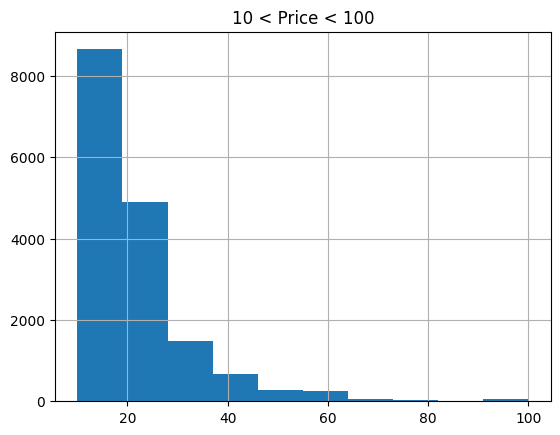

In [7]:
mainline_df = df.copy()[(df.price > 10) & (df.price < 100)]

mainline_df.price.hist()
plt.title('10 < Price < 100')
plt.show()

In [8]:
def high_low_sd(x):
    x_mean = x.mean()
    x_sd = x.std()
    x_low = x_mean - 3*x_sd
    x_high = x_mean + 3*x_sd
    return (x_low, x_high)

high_low_sd(mainline_df.price)

(-12.720296390517237, 54.35965658587743)

In [9]:
mainline_df = mainline_df[mainline_df.price < high_low_sd(mainline_df.price)[1]]
mainline_df.shape

(15966, 47)

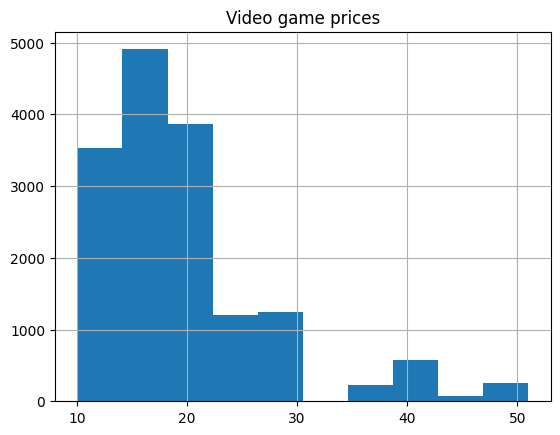

In [130]:
mainline_df.price.hist()
plt.title('Video game prices')
plt.savefig('images/price hist_no xform.png')
plt.show()

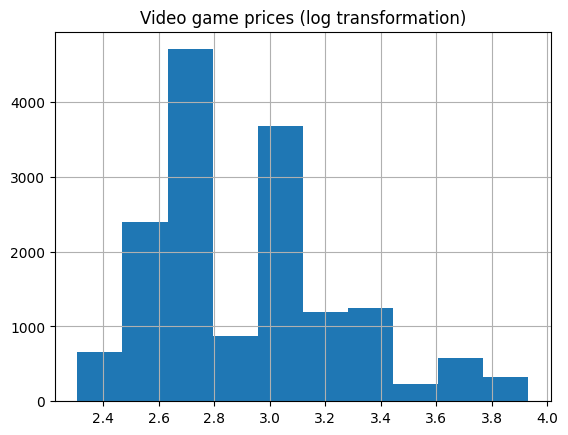

In [131]:
np.log(mainline_df.price).hist()
plt.title('Video game prices (log transformation)')
plt.savefig('images/price hist_log xform.png')
plt.show()

In [12]:
target_features.append('price')
target_transformation['log'] = 'price'

In [13]:
print(target_features)
print(target_transformation)

['price']
{'log': 'price'}


# <span style="color: Teal; font-weight: bold">Preprocessing</span>

## <span style="color: Teal; font-weight: bold">Preprocessing -- Targets</span>
Re-create dataframe to work with (`mainline_df`) as well as remove any observations in the '0 - 0' `estimated_owners` feature group.

15885


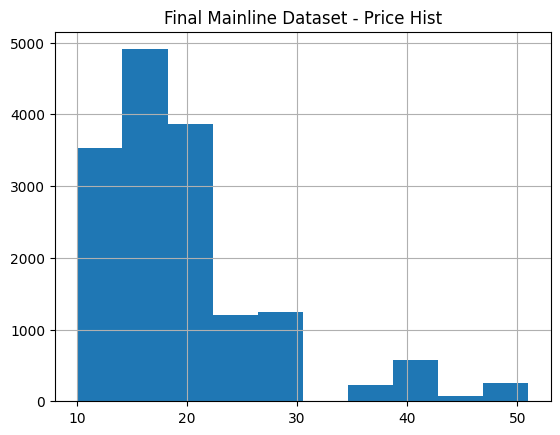

In [14]:
mainline_df = mainline_df.copy()[(mainline_df.estimated_owners != '0 - 0')]
print(mainline_df.shape[0])
mainline_df.price.hist()
plt.title('Final Mainline Dataset - Price Hist')
plt.show()

### Two-stage model features
Create Boolean features to mark the presence of a score

In [15]:
mainline_df['metacritic_bool'] = np.where(mainline_df.metacritic_score > 0, 1, 0)
mainline_df['metacritic_bool'].value_counts(normalize = True)

metacritic_bool
0    0.874284
1    0.125716
Name: proportion, dtype: float64

In [16]:
mainline_df['recommendations_bool'] = np.where(mainline_df.recommendations > 0, 1, 0)
mainline_df['recommendations_bool'].value_counts(normalize = True)

recommendations_bool
0    0.554674
1    0.445326
Name: proportion, dtype: float64

In [17]:
target_features.append('metacritic_bool')
target_features.append('recommendations_bool')

### Log price
Find the log of the price

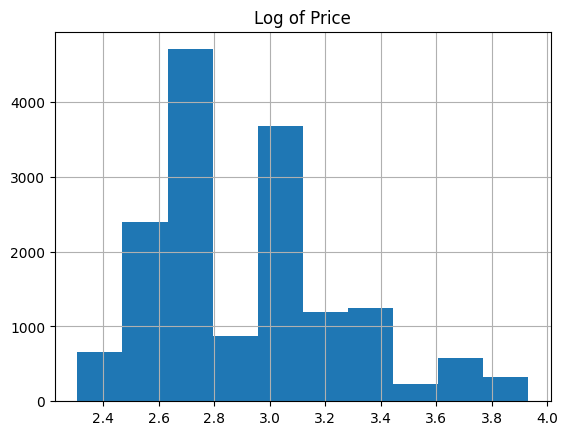

In [18]:
mainline_df['price_log'] = np.log(mainline_df.copy()['price'])
mainline_df['price_log'].hist()
plt.title('Log of Price')
plt.show()

In [19]:
target_features.append('price_log')
target_features

['price', 'metacritic_bool', 'recommendations_bool', 'price_log']

## <span style="color: Teal; font-weight: bold">Final Target Features list

In [20]:
target_features.remove('price')
target_features.remove('metacritic_bool')
target_features.remove('recommendations_bool')

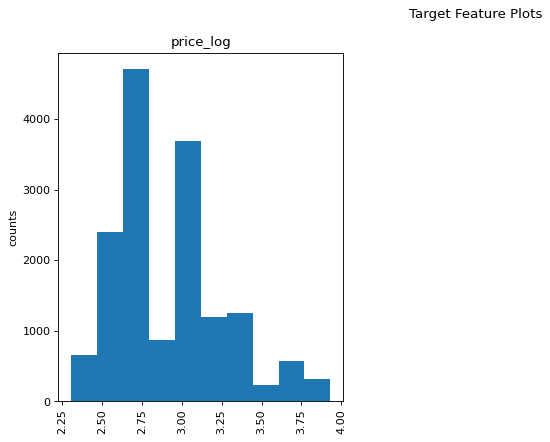

In [22]:
plotColumnCounts(mainline_df, target_features, number_graphs_per_row = 3, outlier_mask = False, stitle = 'Target Feature Plots', dropna = True, auto_show = True)

## <span style="color: Teal; font-weight: bold">Preprocessing -- Predictors</span>
Identify columns to preprocess, then preprocess

In [23]:
# Create list for holding all model DataFrames
model_df_list = {'main': mainline_df}

In [24]:
## preprocess group descriptions
# descriptions - descriptive text of some kind, which may be useful to process with NLU
# to_drop - drop these from DataFrame entirely
# to_make_boolean - turn these into Boolean, with True representing the presence of a value and False otherwise
# to_make_integer - turn these into integer, with count of values from list-like object
# list_like - values are list-like objects; need to specially preprocess
# JSON_like - JSON-like structure; need to specially preprocess

pp_predictors_all = {'descriptions': ['about_the_game', 'short_description', 'reviews', 'notes'],
                     'to_drop': ['header_image', 'metacritic_url', 'user_score', 'score_rank', 'average_playtime_forever', 'median_playtime_forever', 'average_playtime_2weeks', 'median_playtime_2weeks'],
                     'to_make_boolean': ['website', 'support_url', 'support_email', 'screenshots', 'movies'],
                     'to_make_integer': ['supported_languages', 'full_audio_languages'],
                     'list_like': ['developers', 'publishers', 'categories', 'genres'],
                     'JSON_like': ['tags']
                     }

# double check all columns spelled correctly
all_inside = {}
all_inside_list = []

# make sure spellings are correct
for temp_listname, temp_list in pp_predictors_all.items():
    all_inside[temp_listname] = {}
    for temp_colname in temp_list:
        all_inside_list.append(temp_colname in df.columns)
        all_inside[temp_listname][temp_colname] = temp_colname in df.columns

all(all_inside_list)

True

**Special Cases & Notes**:
- `supported_languages` and `full_audio_languages` -- list-like entries, but many in `full_audio_languages` are empty lists, and number of entries may matter. Get a list of languages as well as count of how many languages
- `pct_pos_total` is percent positive revivews "total"; `pct_pos_recent` is percent positive reviews "recently"

**Preprocessing Notes**:
Features need to be separated into preprocessing categories, depending on needs of columns. These include:
- OHE: Low-count categories can be put into this
- TargetEncoding: High-count categories can be put into this
- NLU: Text data that may benefit from natural language preprocessing can be put here. *(To be put aside in another DataFrame for now, to see if a separate model can be built with this data.)*

In [25]:
# create list for predictors to include in main model (not including genre or tags)
main_model_predictors = []

In [26]:
# Can AppID be used as an index?
mainline_df.AppID.nunique() == mainline_df.shape[0]

True

### <span style="color: Teal; font-weight: bold">Drop</span>
Drop Columns and make AppID the index

In [27]:
mainline_df = mainline_df.drop(pp_predictors_all['to_drop'], axis = 1).set_index('AppID')

In [28]:
print(mainline_df.columns)
mainline_df.head()

Index(['Unnamed: 0', 'name', 'release_date', 'required_age', 'price',
       'dlc_count', 'detailed_description', 'about_the_game',
       'short_description', 'reviews', 'website', 'support_url',
       'support_email', 'windows', 'mac', 'linux', 'metacritic_score',
       'achievements', 'recommendations', 'notes', 'supported_languages',
       'full_audio_languages', 'packages', 'developers', 'publishers',
       'categories', 'genres', 'screenshots', 'movies', 'positive', 'negative',
       'estimated_owners', 'peak_ccu', 'tags', 'pct_pos_total',
       'num_reviews_total', 'pct_pos_recent', 'num_reviews_recent',
       'metacritic_bool', 'recommendations_bool', 'price_log'],
      dtype='object')


,Unnamed: 0,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,...,estimated_owners,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent,metacritic_bool,recommendations_bool,price_log
AppID,,,,,,,,,,,,,,,,,,,,,
359550,4,Tom Clancy's Rainbow Six® Siege,2015-12-01,17,19.99,9,Edition Comparison Ultimate Edition The Tom Cl...,“One of the best first-person shooters ever ma...,"Tom Clancy's Rainbow Six® Siege is an elite, t...",NaN,...,20000000 - 50000000,68162,"{'FPS': 9689, 'PvP': 9073, 'e-sports': 9026, '...",85,1091695,77,10566,0,1,2.995232
252490,8,Rust,2018-02-08,17,39.99,4,The only aim in Rust is to survive. Everything...,The only aim in Rust is to survive. Everything...,The only aim in Rust is to survive. Everything...,"“Rust is one of the cruelest games on Steam, a...",...,50000000 - 100000000,122371,"{'Survival': 17867, 'Crafting': 11333, 'Multip...",87,874762,86,9347,1,1,3.688629
1091500,11,Cyberpunk 2077,2020-12-09,17,29.99,3,Cyberpunk 2077: Ultimate Edition Check out oth...,"Cyberpunk 2077 is an open-world, action-advent...","Cyberpunk 2077 is an open-world, action-advent...",NaN,...,20000000 - 50000000,35065,"{'Cyberpunk': 6103, 'Open World': 5474, 'Nudit...",83,655887,94,8433,1,1,3.400864
553850,13,HELLDIVERS™ 2,2024-02-08,17,39.99,0,Digital Deluxe Edition Edition includes: ‘DP-5...,The Galaxy’s Last Line of Offence. Enlist in t...,The Galaxy’s Last Line of Offence. Enlist in t...,NaN,...,20000000 - 50000000,46813,"{'Online Co-Op': 609, 'Third-Person Shooter': ...",73,641080,66,321958,0,1,3.688629
413150,15,Stardew Valley,2016-02-26,0,14.99,1,Stardew Valley is an open-ended country-life R...,Stardew Valley is an open-ended country-life R...,You've inherited your grandfather's old farm p...,"“Far more than just a farming game, this one-m...",...,20000000 - 50000000,91798,"{'Farming Sim': 7032, 'Pixel Graphics': 6609, ...",98,602714,98,14182,1,1,2.707383


### <span style="color: Teal; font-weight: bold">Boolean

In [29]:
mainline_df[pp_predictors_all['to_make_boolean']].dtypes

website          object
support_url      object
support_email    object
screenshots      object
movies           object
dtype: object

In [30]:
sum(mainline_df.movies == '[]')

348

In [31]:
mainline_df.loc[359550,].isna()

Unnamed: 0              False
name                    False
release_date            False
required_age            False
price                   False
dlc_count               False
detailed_description    False
about_the_game          False
short_description       False
reviews                  True
website                 False
support_url             False
support_email            True
windows                 False
mac                     False
linux                   False
metacritic_score        False
achievements            False
recommendations         False
notes                    True
supported_languages     False
full_audio_languages    False
packages                False
developers              False
publishers              False
categories              False
genres                  False
screenshots             False
movies                  False
positive                False
negative                False
estimated_owners        False
peak_ccu                False
tags      

In [32]:
# screenshots, movies: str value of '[]'
# website, support_url, support_email: .isna() will catch

def boolean_transform(value):
    if pd.isna(value):
        return 0
    elif value == '[]':
        return 0
    else:
        return 1

In [33]:
for bool_col in pp_predictors_all['to_make_boolean']:
    new_colname = bool_col + '_bool'
    mainline_df[new_colname] = mainline_df.copy()[bool_col].apply(boolean_transform)

In [34]:
boolean_colnames = [item + '_bool' for item in pp_predictors_all['to_make_boolean']]
boolean_colnames

['website_bool',
 'support_url_bool',
 'support_email_bool',
 'screenshots_bool',
 'movies_bool']

In [35]:
mainline_df[pp_predictors_all['to_make_boolean']+boolean_colnames].head()

,website,support_url,support_email,screenshots,movies,website_bool,support_url_bool,support_email_bool,screenshots_bool,movies_bool
AppID,,,,,,,,,,
359550,http://rainbow6.ubi.com/,http://support.ubi.com,NaN,['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,1,1,0,1,1
252490,http://rust.facepunch.com/,http://support.facepunchstudios.com/,NaN,['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,1,1,0,1,1
1091500,https://www.cyberpunk.net,http://en.cdprojektred.com/support,NaN,['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,1,1,0,1,1
553850,NaN,https://www.playstation.com/en-us/games/helldi...,support@arrowhead.zendesk.com,['https://shared.akamai.steamstatic.com/store_...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,1,1,1,1
413150,http://www.stardewvalley.net,NaN,support@stardewvalley.net,['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,1,0,1,1,1


In [36]:
for temp_colname in boolean_colnames:
    temp_0 = sum(mainline_df[temp_colname] == 0)
    temp_1 = sum(mainline_df[temp_colname] == 1)
    print(f"{temp_colname} 0: {temp_0} || 1: {temp_1} || Check: {temp_0 + temp_1 == mainline_df.shape[0]} || prop_0: {round(temp_0/(temp_0+temp_1), 3)}")

website_bool 0: 5520 || 1: 10365 || Check: True || prop_0: 0.347
support_url_bool 0: 6019 || 1: 9866 || Check: True || prop_0: 0.379
support_email_bool 0: 2818 || 1: 13067 || Check: True || prop_0: 0.177
screenshots_bool 0: 5 || 1: 15880 || Check: True || prop_0: 0.0
movies_bool 0: 348 || 1: 15537 || Check: True || prop_0: 0.022


In [37]:
# Only include columns where more than 25% are missing (otherwise not enough data to be useful)
main_model_predictors += ['website_bool', 'support_url_bool']
main_model_predictors

['website_bool', 'support_url_bool']

### <span style="color: Teal; font-weight: bold">Integer
Make integer columns

In [38]:
mainline_df[pp_predictors_all['to_make_integer']].head()

,supported_languages,full_audio_languages
AppID,,
359550,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp..."
252490,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp..."
1091500,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp..."
553850,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp..."
413150,"['English', 'German', 'Spanish - Spain', 'Japa...",[]


In [39]:
def converted_list_length(value):
    return len(ast.literal_eval(value))

for temp_intcol in pp_predictors_all['to_make_integer']:
    int_colname = temp_intcol + '_int'
    mainline_df[int_colname] = mainline_df.copy()[temp_intcol].apply(converted_list_length)

In [40]:
int_colnames = [colname+'_int' for colname in pp_predictors_all['to_make_integer']]
int_colnames

['supported_languages_int', 'full_audio_languages_int']

In [41]:
print(mainline_df.loc[359550,'supported_languages'])
print(mainline_df.loc[359550,'supported_languages_int'])

['English', 'French', 'Italian', 'German', 'Spanish - Spain', 'Czech', 'Dutch', 'Japanese', 'Korean', 'Polish', 'Portuguese - Brazil', 'Russian', 'Traditional Chinese', 'Simplified Chinese', 'Turkish', 'Thai']
16


In [42]:
print(mainline_df.loc[1091500,'full_audio_languages'])
print(mainline_df.loc[1091500,'full_audio_languages_int'])

['English', 'French', 'Italian', 'German', 'Spanish - Spain', 'Japanese', 'Korean', 'Polish', 'Portuguese - Brazil', 'Russian', 'Simplified Chinese', 'Ukrainian']
12


In [43]:
main_model_predictors += int_colnames
main_model_predictors

['website_bool',
 'support_url_bool',
 'supported_languages_int',
 'full_audio_languages_int']

### <span style="color: Teal; font-weight: bold">Handling Lists</span>
The work necessary to convert lists to the correct values, then do the proper encoding, is in this section.

In [44]:
mainline_df[pp_predictors_all['list_like']].head()

,developers,publishers,categories,genres
AppID,,,,
359550,['Ubisoft Montreal'],['Ubisoft'],"['Single-player', 'Multi-player', 'PvP', 'Onli...",['Action']
252490,['Facepunch Studios'],['Facepunch Studios'],"['Multi-player', 'MMO', 'PvP', 'Online PvP', '...","['Action', 'Adventure', 'Indie', 'Massively Mu..."
1091500,['CD PROJEKT RED'],['CD PROJEKT RED'],"['Single-player', 'Steam Achievements', 'Full ...",['RPG']
553850,['Arrowhead Game Studios'],['PlayStation PC LLC'],"['Multi-player', 'Co-op', 'Online Co-op', 'Ste...",['Action']
413150,['ConcernedApe'],['ConcernedApe'],"['Single-player', 'Multi-player', 'Co-op', 'On...","['Indie', 'RPG', 'Simulation']"


In [45]:
# convert these to int columns to get counts; if any only ever have one value, can turn those to object columns
list_countcolnames = [col_name+'_count' for col_name in pp_predictors_all['list_like']]

def converted_list_length(value):
    return len(ast.literal_eval(value))

for temp_intcol in pp_predictors_all['list_like']:
    count_colname = temp_intcol + '_count'
    mainline_df[count_colname] = mainline_df.copy()[temp_intcol].apply(converted_list_length)

In [46]:
mainline_df[list_countcolnames].nunique()

developers_count    10
publishers_count     4
categories_count    24
genres_count        11
dtype: int64

The count of these are likely not important. It's likely that having 2 or more developers on a game may have no relationship to the quality; and the same could be said for publishers. I could see number of categories and genres being related to popularity, but it is likely that the actual values of these features are more strongly related.

These should be included in a second or third model--that is, predicting the targets with just developers and publishers, and then with just categories and/or genres. Multiple models will increase interpretive complexity but will reduce dimensionality.

To do this, I would create new DataFrames for each model, and create columns with Boolean values reflecting whether each value appeared in the list. However, this is only feasible if there aren't too many unique values in each. There may be too many publishers and developers to model, but may be able to identify grouped average for price and get some information that way.

In [47]:
from datetime import datetime

# get counts of all values for each feature
all_names_dict = {'developers': {},#{'value': [], 'count': 0},
                  'publishers': {},#{'value': [], 'count': 0},
                  'categories': {},#{'value': [], 'count': 0},
                  'genres': {}#{'value': [], 'count': 0}}
                 }
print(f"Start time: {datetime.now().strftime("%H:%M:%S")}")

for temp_key in all_names_dict.keys():
    row_count = 0
    #print(f"temp_key: {temp_key}")#temp_values_list = []
    for temp_entry in mainline_df[temp_key]:
        row_count += 1
        #print(f"temp_entry: {temp_entry}")
        temp_list = ast.literal_eval(temp_entry)
        #print(f"temp_list: {temp_list} || length: {len(temp_list)}")
        if len(temp_list) == 1:
            if temp_list[0] not in all_names_dict[temp_key].keys():
                all_names_dict[temp_key][temp_list[0]] = 0
            all_names_dict[temp_key][temp_list[0]] += 1
        else:
            for temp_value in temp_list:
                if temp_value not in all_names_dict[temp_key].keys(): #temp_values_list:
                    all_names_dict[temp_key][temp_value] = 0
                all_names_dict[temp_key][temp_value] += 1
        
        #print(f"current: {all_names_dict[temp_key]}")
    print(f"--Complete: {temp_key}. Time: {datetime.now().strftime("%H:%M:%S")}")

print(f"End time: {datetime.now().strftime("%H:%M:%S")}")

Start time: 17:55:14
--Complete: developers. Time: 17:55:14
--Complete: publishers. Time: 17:55:14
--Complete: categories. Time: 17:55:14
--Complete: genres. Time: 17:55:14
End time: 17:55:14


In [48]:
# Print the counts of unique values contained within each feature--this will show how many features extra models would have
for temp_key in all_names_dict.keys():
    print(f"{temp_key} -- {len(all_names_dict[temp_key])}")

developers -- 11914
publishers -- 8939
categories -- 39
genres -- 27


In [49]:
pd.DataFrame({'developer_names': all_names_dict['developers'].keys(), 'counts': all_names_dict['developers'].values()}).sort_values('counts', ascending=False).head()

,developer_names,counts
270,"KOEI TECMO GAMES CO., LTD.",68
82,Square Enix,58
9107,Individual Software,42
7906,"CyberStep, Inc.",41
8885,"Rideon Works Co. Ltd,",38


Developers likely don't show up often enough to be useful; far too imbalanced to use for anything other than TargetEncoding, but how would that work due to an overlap of developers within games.

In [50]:
pd.DataFrame({'publisher_names': all_names_dict['publishers'].keys(), 'counts': all_names_dict['publishers'].values()}).sort_values('counts', ascending=False).head(n = 10)

,publisher_names,counts
273,Kagura Games,126
459,Sekai Project,93
76,SEGA,84
361,Slitherine Ltd.,82
58,Square Enix,79
188,THQ Nordic,77
5007,Big Fish Games,71
367,Nacon,67
86,PlayWay S.A.,67
404,Microids,65


In [51]:
pd.DataFrame({'category_names': all_names_dict['categories'].keys(), 'counts': all_names_dict['categories'].values()}).sort_values('counts', ascending=False)

,category_names,counts
18,Family Sharing,15384
0,Single-player,15144
13,Steam Achievements,9067
17,Steam Cloud,6700
6,Full controller support,5103
1,Multi-player,4003
7,Steam Trading Cards,3398
19,Partial Controller Support,2362
4,Co-op,2362
2,PvP,2345


In [52]:
pd.DataFrame({'genre_names': all_names_dict['genres'].keys(), 'counts': all_names_dict['genres'].values()}).sort_values('counts', ascending=False)

,genre_names,counts
2,Indie,9704
1,Adventure,7279
0,Action,6709
9,Casual,4317
5,Simulation,4212
4,RPG,3949
7,Strategy,3584
6,Early Access,2463
10,Sports,912
8,Racing,594


It looks like categories and genres may be useful to look at, but not developers and publishers, due to low category representation.

In [53]:
mainline_df['categories'].str.contains('ingle').head()

AppID
359550      True
252490     False
1091500     True
553850     False
413150      True
Name: categories, dtype: bool

In [54]:
catgen_model_predictors = ['categories', 'genres']
catgen_model_cols = {}

for base_feature in catgen_model_predictors:
    for feature_category in all_names_dict[base_feature].keys():
        temp_featurename = base_feature+'_'+feature_category.lower().replace(' ','_') # improve naming conventions
        catgen_model_cols[temp_featurename] = np.where(mainline_df[base_feature].str.contains(feature_category), 1, 0)

In [55]:
catgen_df = pd.DataFrame(catgen_model_cols, index = mainline_df.index)
catgen_df.head()

,categories_single-player,categories_multi-player,categories_pvp,categories_online_pvp,categories_co-op,categories_online_co-op,categories_full_controller_support,categories_steam_trading_cards,categories_in-app_purchases,categories_remote_play_on_phone,...,genres_audio_production,genres_video_production,genres_software_training,genres_game_development,genres_animation_&_modeling,genres_design_&_illustration,genres_education,genres_photo_editing,genres_web_publishing,genres_accounting
AppID,,,,,,,,,,,,,,,,,,,,,
359550,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
252490,0,1,1,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1091500,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
553850,0,1,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
413150,1,1,0,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


The above looks like it worked. 'Co-op' and 'PvP' are common terms; see if there are ever instances where they appear when their more specific versions do not. If not, remove those columns.

In [57]:
catgen_df[[col for col in catgen_df.columns if 'pvp' in col.lower()]].value_counts()

categories_pvp  categories_online_pvp  categories_lan_pvp  categories_shared/split_screen_pvp
0               0                      0                   0                                     13539
1               1                      0                   0                                      1089
                0                      0                   1                                       567
                1                      0                   1                                       482
                                       1                   0                                       144
                                                           1                                        25
                0                      0                   0                                        23
                                       1                   0                                        13
                                                           1                      

In [58]:
catgen_df[[col for col in catgen_df.columns if 'co-op' in col.lower()]].value_counts()

categories_co-op  categories_online_co-op  categories_lan_co-op  categories_shared/split_screen_co-op
0                 0                        0                     0                                       13521
1                 1                        0                     0                                         960
                  0                        0                     1                                         731
                  1                        0                     1                                         283
                  0                        0                     0                                         185
                  1                        1                     0                                         156
                                                                 1                                          29
                  0                        1                     0                                          19
          

In [59]:
catgen_df.drop(['categories_co-op', 'categories_pvp'], axis = 1, inplace=True)
catgen_df.columns

Index(['categories_single-player', 'categories_multi-player',
       'categories_online_pvp', 'categories_online_co-op',
       'categories_full_controller_support', 'categories_steam_trading_cards',
       'categories_in-app_purchases', 'categories_remote_play_on_phone',
       'categories_remote_play_on_tablet', 'categories_mmo',
       'categories_cross-platform_multiplayer',
       'categories_steam_achievements', 'categories_steam_workshop',
       'categories_valve_anti-cheat_enabled', 'categories_stats',
       'categories_steam_cloud', 'categories_family_sharing',
       'categories_partial_controller_support', 'categories_lan_co-op',
       'categories_shared/split_screen_co-op',
       'categories_shared/split_screen', 'categories_remote_play_together',
       'categories_tracked_controller_support', 'categories_vr_supported',
       'categories_remote_play_on_tv', 'categories_includes_level_editor',
       'categories_lan_pvp', 'categories_steam_leaderboards',
       'catego

Good--will add the target columns to this when that preprocessing is done.

Also drop any features with <10% presence in the data

In [60]:
catgen_drop_features = catgen_df.columns[catgen_df.sum() < (catgen_df.shape[0]/10)]
catgen_df.drop(catgen_drop_features, axis=1, inplace=True)
catgen_df.sum()

categories_single-player                 15144
categories_multi-player                   4003
categories_online_pvp                     1740
categories_full_controller_support        5103
categories_steam_trading_cards            3398
categories_steam_achievements             9067
categories_steam_cloud                    6700
categories_family_sharing                15384
categories_partial_controller_support     2362
categories_shared/split_screen            1804
categories_remote_play_together           1730
genres_action                             6709
genres_adventure                          7279
genres_indie                              9704
genres_rpg                                3949
genres_simulation                         4212
genres_early_access                       2463
genres_strategy                           3584
genres_casual                             4317
dtype: int64

In [61]:
model_df_list['categories'] = catgen_df
model_df_list.keys()

dict_keys(['main', 'categories'])

### <span style="color: Teal; font-weight: bold">Handling JSON-like features</span>

In [62]:
mainline_df['tags'].head()

AppID
359550     {'FPS': 9689, 'PvP': 9073, 'e-sports': 9026, '...
252490     {'Survival': 17867, 'Crafting': 11333, 'Multip...
1091500    {'Cyberpunk': 6103, 'Open World': 5474, 'Nudit...
553850     {'Online Co-Op': 609, 'Third-Person Shooter': ...
413150     {'Farming Sim': 7032, 'Pixel Graphics': 6609, ...
Name: tags, dtype: object

The `tags` feature is a dictionary-like string feature containing tag names and counts. There are multiple ways I could code this:
- Just get a Boolean representation if a tag is present for a game
- Get a count of how many tags are present for each game (which could be an indirect metric of popularity)
- Get a raw count of tag value for each game
- Get a normalized count of tag value for each game, accounting for the total number of people played

We can't get a good estimate of number of people who play the game, so number three is out--any normalization process won't be sensitive enough just using the range from `estimated_owners`. Any predictive feature matrix will be a relatively sparse matrix, since most games will have relatively few tags attached to them.

I think this should be handled in two ways--another model, using the presence of a tag to predict targets (e.g., Boolean), and a single count value added to the original model.

**Add `tags_count` to mainline_df:**

In [63]:
mainline_df['tags_count'] = mainline_df.copy()['tags'].apply(lambda x: x.count(':'))

mainline_df[['tags', 'tags_count']].head()

,tags,tags_count
AppID,,
359550,"{'FPS': 9689, 'PvP': 9073, 'e-sports': 9026, '...",20
252490,"{'Survival': 17867, 'Crafting': 11333, 'Multip...",20
1091500,"{'Cyberpunk': 6103, 'Open World': 5474, 'Nudit...",20
553850,"{'Online Co-Op': 609, 'Third-Person Shooter': ...",20
413150,"{'Farming Sim': 7032, 'Pixel Graphics': 6609, ...",20


<Axes: >

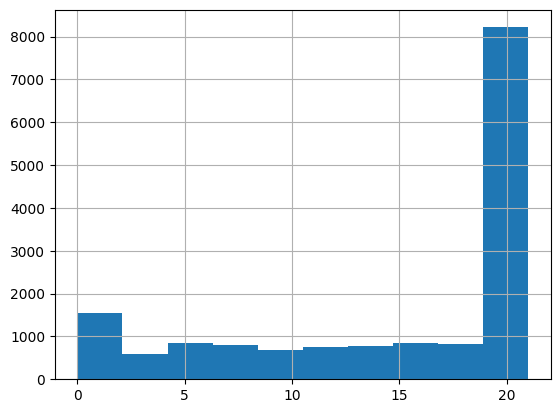

In [64]:
mainline_df['tags_count'].hist()

<Axes: xlabel='tags_count', ylabel='price'>

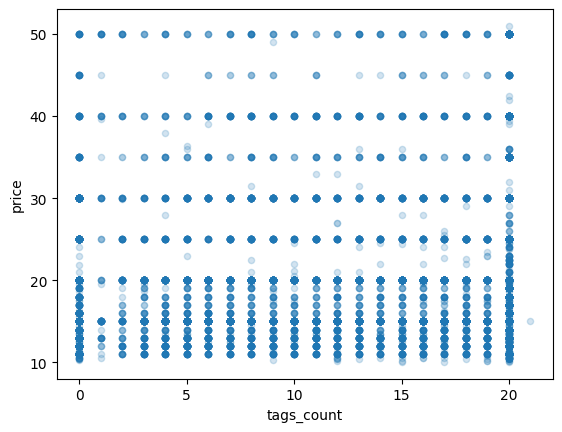

In [65]:
mainline_df.plot(kind = 'scatter', x = 'tags_count', y = 'price', alpha = 0.2)

This may still be useful--add it to the main model

In [66]:
main_model_predictors += ['tags_count']
main_model_predictors

['website_bool',
 'support_url_bool',
 'supported_languages_int',
 'full_audio_languages_int',
 'tags_count']

**Create third model for tags**

In [67]:
# get base of all tags, then for each observation, add an indicator if more than 1/3 the max tag value identified that tag for that game (avoid spurious tags)
base_tags = mainline_df.copy().tags

In [68]:
# get list of tags
tags_list_dict = {'Total': 0}

# Iterate over each row in the 'tags' column
for tags_dict in base_tags:
    tags_list_dict['Total'] += 1
    # Update the set with keys from the current dict
    tags_dict = ast.literal_eval(tags_dict)
    if not isinstance(tags_dict, dict):
        continue
    for temp_key in tags_dict:
        if temp_key not in tags_list_dict.keys():
            tags_list_dict[temp_key] = 0
        tags_list_dict[temp_key] += 1#tags_dict[temp_key]

In [69]:
base_tags_df = pd.DataFrame(tags_list_dict, index = ['Count']).T.sort_values('Count',ascending = False)
base_tags_df.head()

,Count
Total,15885
Singleplayer,9519
Indie,7078
Adventure,7047
Action,6605


In [70]:
# Only keep values with counts at least 1/10 of total
minimum_value = len(mainline_df)/10
print(minimum_value)
sum(base_tags_df.Count > minimum_value)

1588.5


31

In [71]:
base_tags = list(base_tags_df.copy()[base_tags_df.Count > minimum_value].index)
del base_tags[0] # 'Total' isn't a real tag
base_tags

['Singleplayer',
 'Indie',
 'Adventure',
 'Action',
 'Casual',
 'Simulation',
 '2D',
 'RPG',
 'Story Rich',
 'Strategy',
 'Atmospheric',
 '3D',
 'Exploration',
 'Early Access',
 'Multiplayer',
 'Fantasy',
 'First-Person',
 'Colorful',
 'Anime',
 'Cute',
 'Puzzle',
 'Female Protagonist',
 'Open World',
 'Sci-fi',
 'Pixel Graphics',
 'Funny',
 'Action-Adventure',
 'Shooter',
 'Third Person',
 'Sandbox']

In [72]:
print(base_tags)

['Singleplayer', 'Indie', 'Adventure', 'Action', 'Casual', 'Simulation', '2D', 'RPG', 'Story Rich', 'Strategy', 'Atmospheric', '3D', 'Exploration', 'Early Access', 'Multiplayer', 'Fantasy', 'First-Person', 'Colorful', 'Anime', 'Cute', 'Puzzle', 'Female Protagonist', 'Open World', 'Sci-fi', 'Pixel Graphics', 'Funny', 'Action-Adventure', 'Shooter', 'Third Person', 'Sandbox']


In [73]:
# Create indexable list with dict values for tags
tags_column_series = []
tags_tagvalues_series = []
for i in range(0, len(mainline_df)):
    tags_column_series.append(ast.literal_eval(mainline_df.copy().tags.iloc[i]))
    temp_str_value = ''
    if isinstance(tags_column_series[i], dict):
        for j in tags_column_series[i].keys():
            temp_str_value += j
        tags_tagvalues_series.append(temp_str_value)
    else:
        tags_tagvalues_series.append('')
    if i%1000 == 0:
        print(f"Iteration {i} complete.")

Iteration 0 complete.
Iteration 1000 complete.
Iteration 2000 complete.
Iteration 3000 complete.
Iteration 4000 complete.
Iteration 5000 complete.
Iteration 6000 complete.
Iteration 7000 complete.
Iteration 8000 complete.
Iteration 9000 complete.
Iteration 10000 complete.
Iteration 11000 complete.
Iteration 12000 complete.
Iteration 13000 complete.
Iteration 14000 complete.
Iteration 15000 complete.


In [74]:
# both should be True
print(len(tags_column_series) == len(mainline_df))
print(len(tags_tagvalues_series) == len(mainline_df))

True
True


In [75]:
## Create a dict representing a DataFrame. The dict should have keys corresponding to tags and values representing whether the tag has a significant count
## (more than 1/3 the max tag count for that observation), so that the whole dict can be turned into a DataFrame that accurately maps onto mainline_df and can be
## indexed properly.

### Below: Create a dict to xform to a dataframe, containing correct number for tags in correct spaces
# Create an empty dict for this purpose, with each value holding a list
tags_num_df_dict = {'index': mainline_df.index}
for temp_tag in base_tags:
    tags_num_df_dict[temp_tag] = []

for i in range(0, len(mainline_df)): # Iterate over observations
    for temp_tag in base_tags:  # Iterate over temp_tag
        # if the tag is present in tags_tagvalues_series, it has a corresponding number entry in tags_column_series
        if isinstance(tags_column_series[i], dict):
            if temp_tag in tags_column_series[i].keys(): #tags_tagvalues_series[i]:
                tags_num_df_dict[temp_tag].append(tags_column_series[i][temp_tag])
        # if not, no tag present so value should be 0
            else:
                tags_num_df_dict[temp_tag].append(0)
        else:
            tags_num_df_dict[temp_tag].append(0)
    if i%1000 == 0:
        print(f"Iteration {i} complete.")

Iteration 0 complete.
Iteration 1000 complete.
Iteration 2000 complete.
Iteration 3000 complete.
Iteration 4000 complete.
Iteration 5000 complete.
Iteration 6000 complete.
Iteration 7000 complete.
Iteration 8000 complete.
Iteration 9000 complete.
Iteration 10000 complete.
Iteration 11000 complete.
Iteration 12000 complete.
Iteration 13000 complete.
Iteration 14000 complete.
Iteration 15000 complete.


In [76]:
print(len(tags_num_df_dict['Singleplayer']) == len(mainline_df))

True


In [77]:
tags_bool_df_dict = {'index': mainline_df.index}
for temp_tag in base_tags:
    tags_bool_df_dict[temp_tag] = []


for i in range(0, len(mainline_df)):
    for temp_tag in base_tags:
        if temp_tag in tags_tagvalues_series[i]:
            tags_bool_df_dict[temp_tag].append(1)
        else:
            tags_bool_df_dict[temp_tag].append(0)

In [78]:
pd.DataFrame({'value':tags_tagvalues_series,'Singleplayer':tags_bool_df_dict['Singleplayer']}).head()

,value,Singleplayer
0,FPSPvPe-sportsMultiplayerTacticalShooterCompet...,0
1,SurvivalCraftingMultiplayerOpen WorldOpen Worl...,0
2,CyberpunkOpen WorldNudityRPGSingleplayerSci-fi...,1
3,Online Co-OpThird-Person ShooterMultiplayerAct...,1
4,Farming SimPixel GraphicsLife SimMultiplayerRP...,1


In [79]:
pd.DataFrame({'value':tags_tagvalues_series,'RPG':tags_bool_df_dict['RPG']}).tail()

,value,RPG
15880,WargameImmersive SimMilitaryDiplomacyWarTurn-B...,0
15881,FPSAction RTSTower DefenseRTSShooterStrategyFi...,0
15882,RPGAction RPGExplorationLootOld SchoolDungeon ...,1
15883,,0
15884,,0


In [80]:
tags_num_df = pd.DataFrame(tags_num_df_dict)
tags_num_df.set_index('index', inplace = True)
tags_num_df.head()

,Singleplayer,Indie,Adventure,Action,Casual,Simulation,2D,RPG,Story Rich,Strategy,...,Puzzle,Female Protagonist,Open World,Sci-fi,Pixel Graphics,Funny,Action-Adventure,Shooter,Third Person,Sandbox
index,,,,,,,,,,,,,,,,,,,,,
359550,0,0,0,8875,0,0,0,0,0,4859,...,0,0,0,0,0,0,0,8944,0,0
252490,0,3003,5639,4659,0,2461,0,0,0,0,...,0,0,10699,0,0,0,0,3643,0,6994
1091500,4526,0,2074,2883,0,0,0,4591,4069,0,...,0,0,5474,4331,0,0,0,0,0,0
553850,152,0,0,529,0,0,0,0,0,0,...,0,0,129,438,0,0,0,466,354,0
413150,3056,3788,0,0,3030,4913,2705,6004,0,0,...,0,0,2972,0,6609,0,0,0,0,3986


In [81]:
tags_bool_df = pd.DataFrame(tags_bool_df_dict)
tags_bool_df.set_index('index', inplace = True)
tags_bool_df.head()

,Singleplayer,Indie,Adventure,Action,Casual,Simulation,2D,RPG,Story Rich,Strategy,...,Puzzle,Female Protagonist,Open World,Sci-fi,Pixel Graphics,Funny,Action-Adventure,Shooter,Third Person,Sandbox
index,,,,,,,,,,,,,,,,,,,,,
359550,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
252490,0,1,1,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1091500,1,0,1,1,0,0,0,1,1,0,...,0,0,1,1,0,0,0,0,0,0
553850,1,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,1,0
413150,1,1,0,0,1,1,1,1,0,0,...,0,0,1,0,1,0,0,0,0,1


Everything looks good--add these to the model list

In [82]:
model_df_list['tags_num'] = tags_num_df
model_df_list['tags_bool'] = tags_bool_df
model_df_list.keys()

dict_keys(['main', 'categories', 'tags_num', 'tags_bool'])

## <span style="color: Teal; font-weight: bold">Correlations</span>

Below are the correlations for the final predictors and targets for the model.

In [85]:
mainline_model = ['website_bool', 'support_url_bool', 'supported_languages_int', 'full_audio_languages_int', 'tags_count']
target_features = ['price_log']

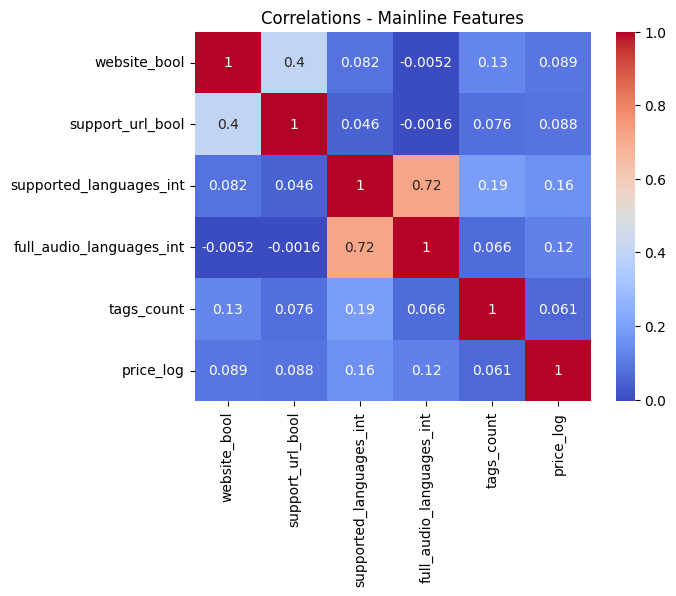

In [86]:
sns.heatmap(mainline_df[mainline_model+target_features].corr(), annot = True, cmap = "coolwarm")
plt.title('Correlations - Mainline Features')
plt.show()

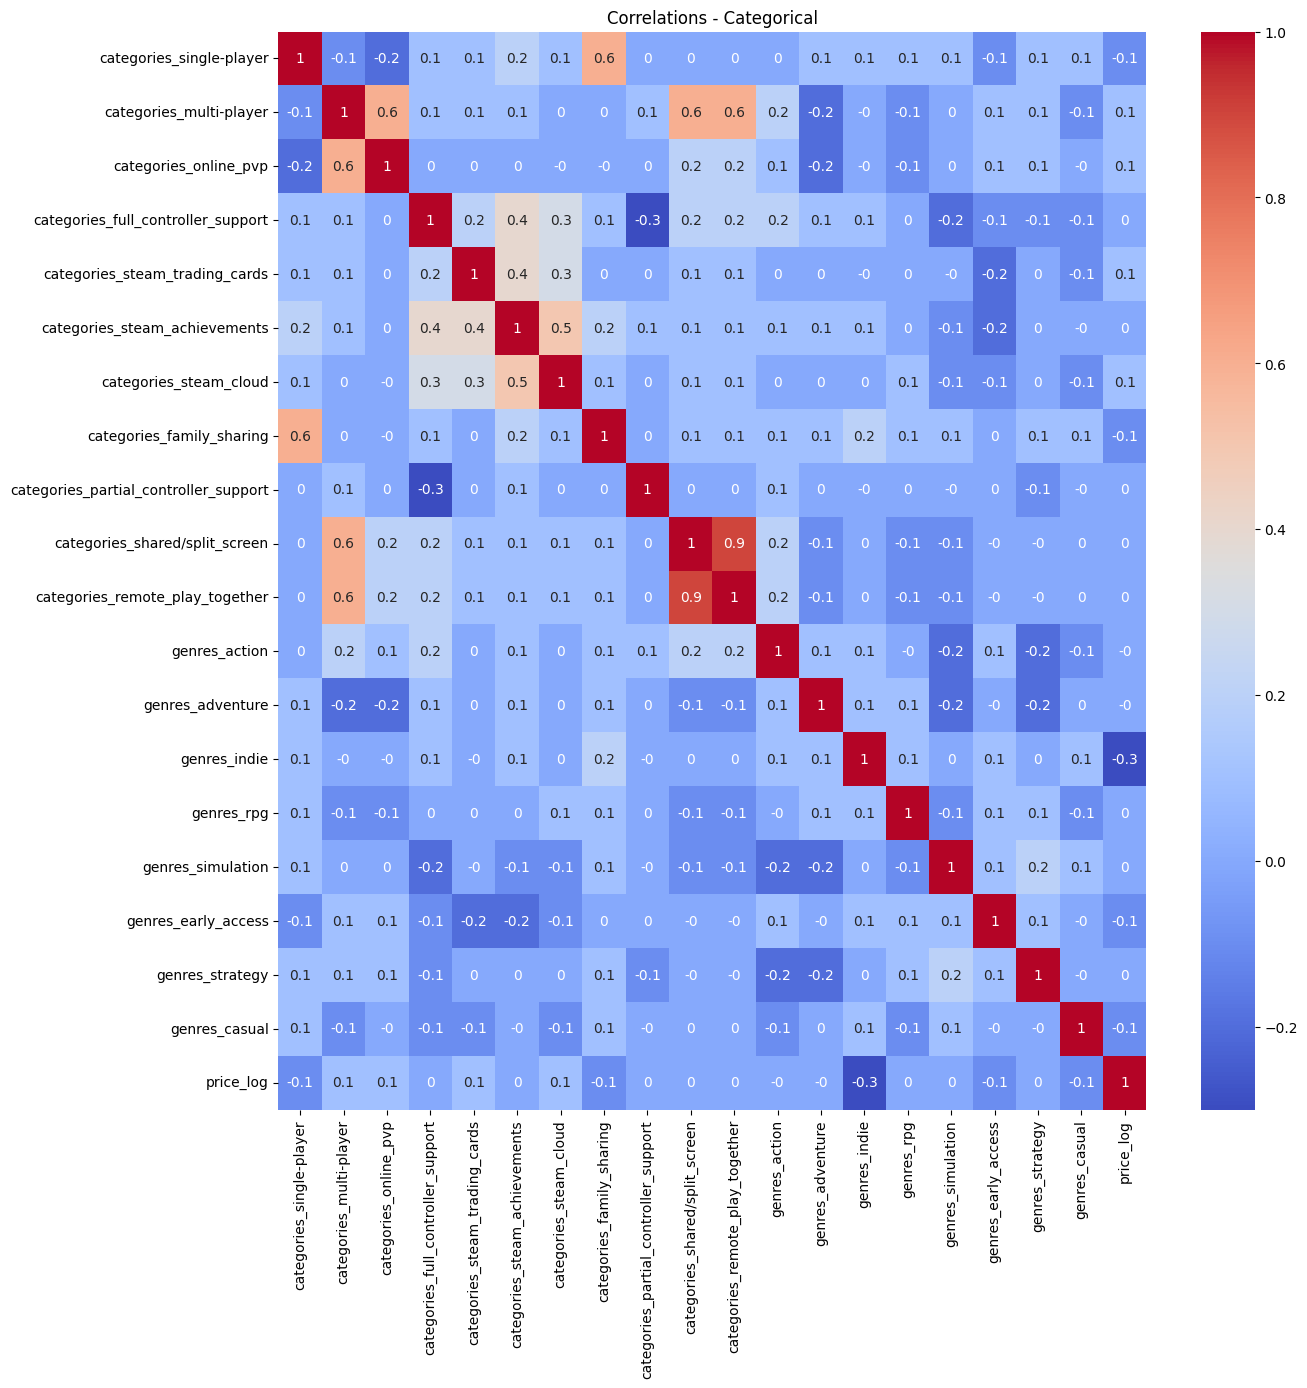

In [87]:
plt.figure(figsize = (14, 14))
sns.heatmap(round(pd.concat([catgen_df, mainline_df[target_features]], axis = 1).corr(),1), annot = True, cmap = "coolwarm")
plt.title('Correlations - Categorical')
plt.show()

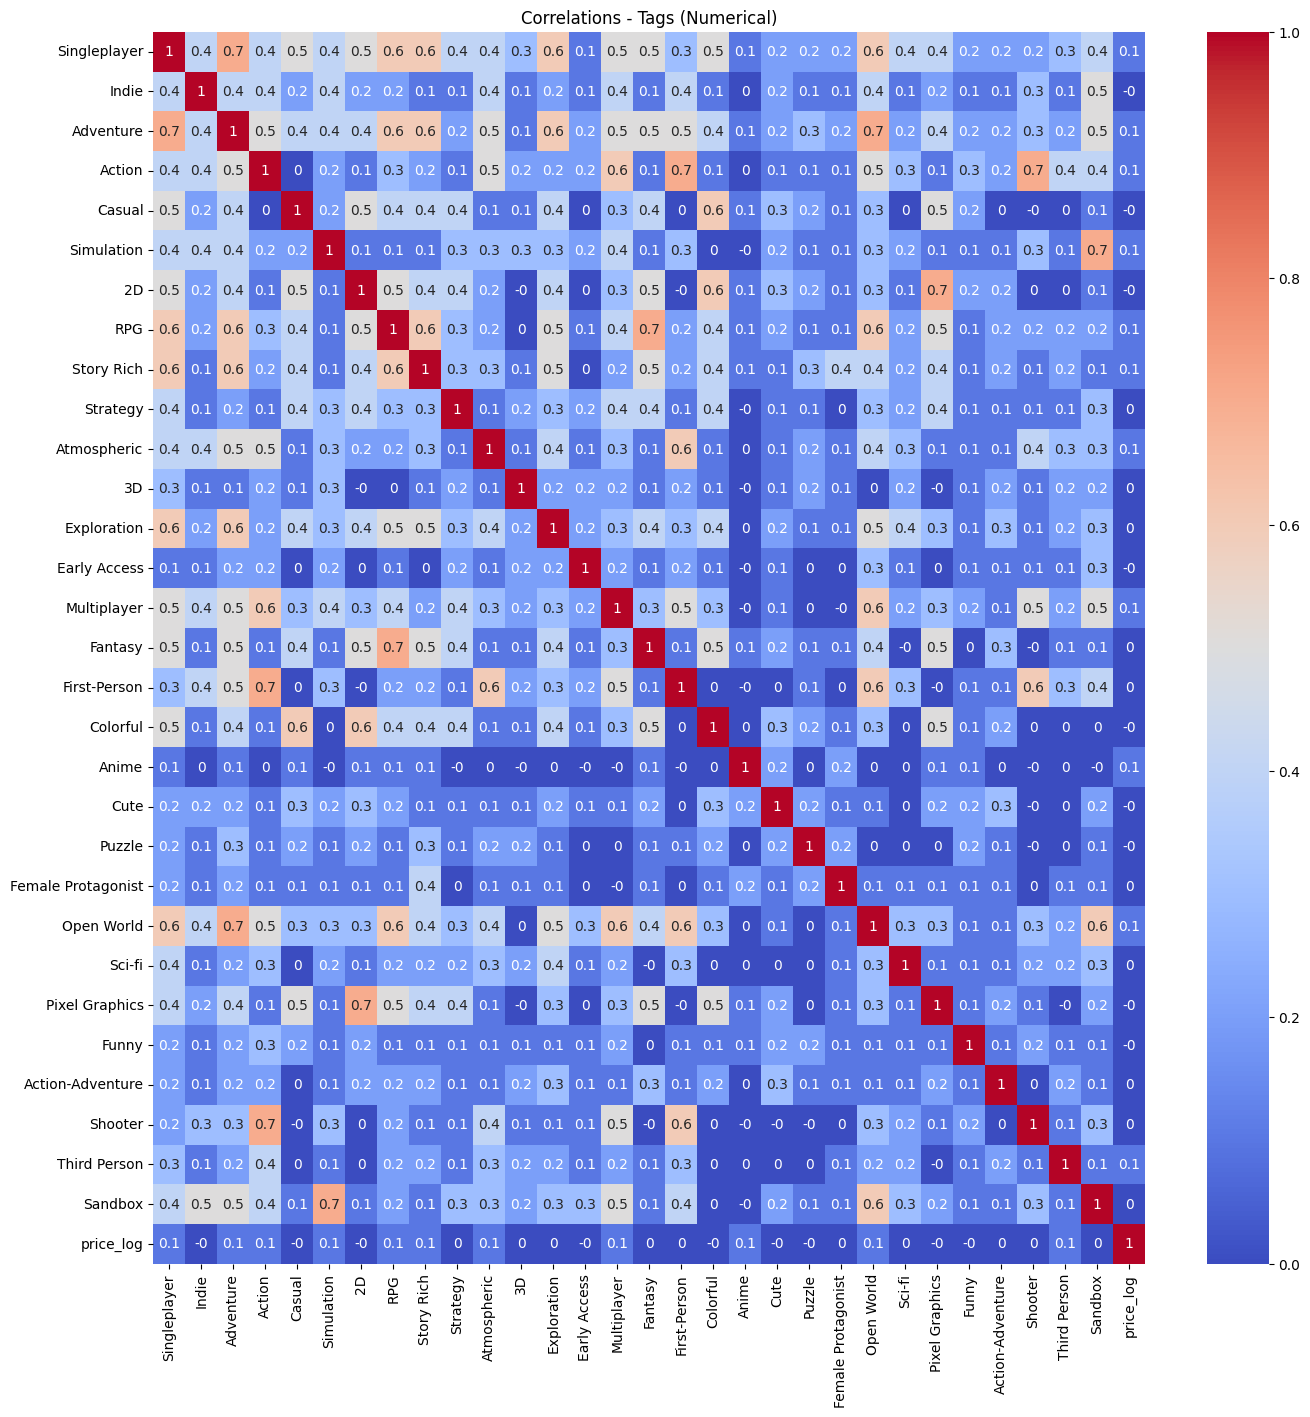

In [88]:
plt.figure(figsize = (16, 16))
sns.heatmap(round(pd.concat([tags_num_df, mainline_df[target_features]], axis = 1).corr(),1), annot = True, cmap = "coolwarm")
plt.title('Correlations - Tags (Numerical)')
plt.show()

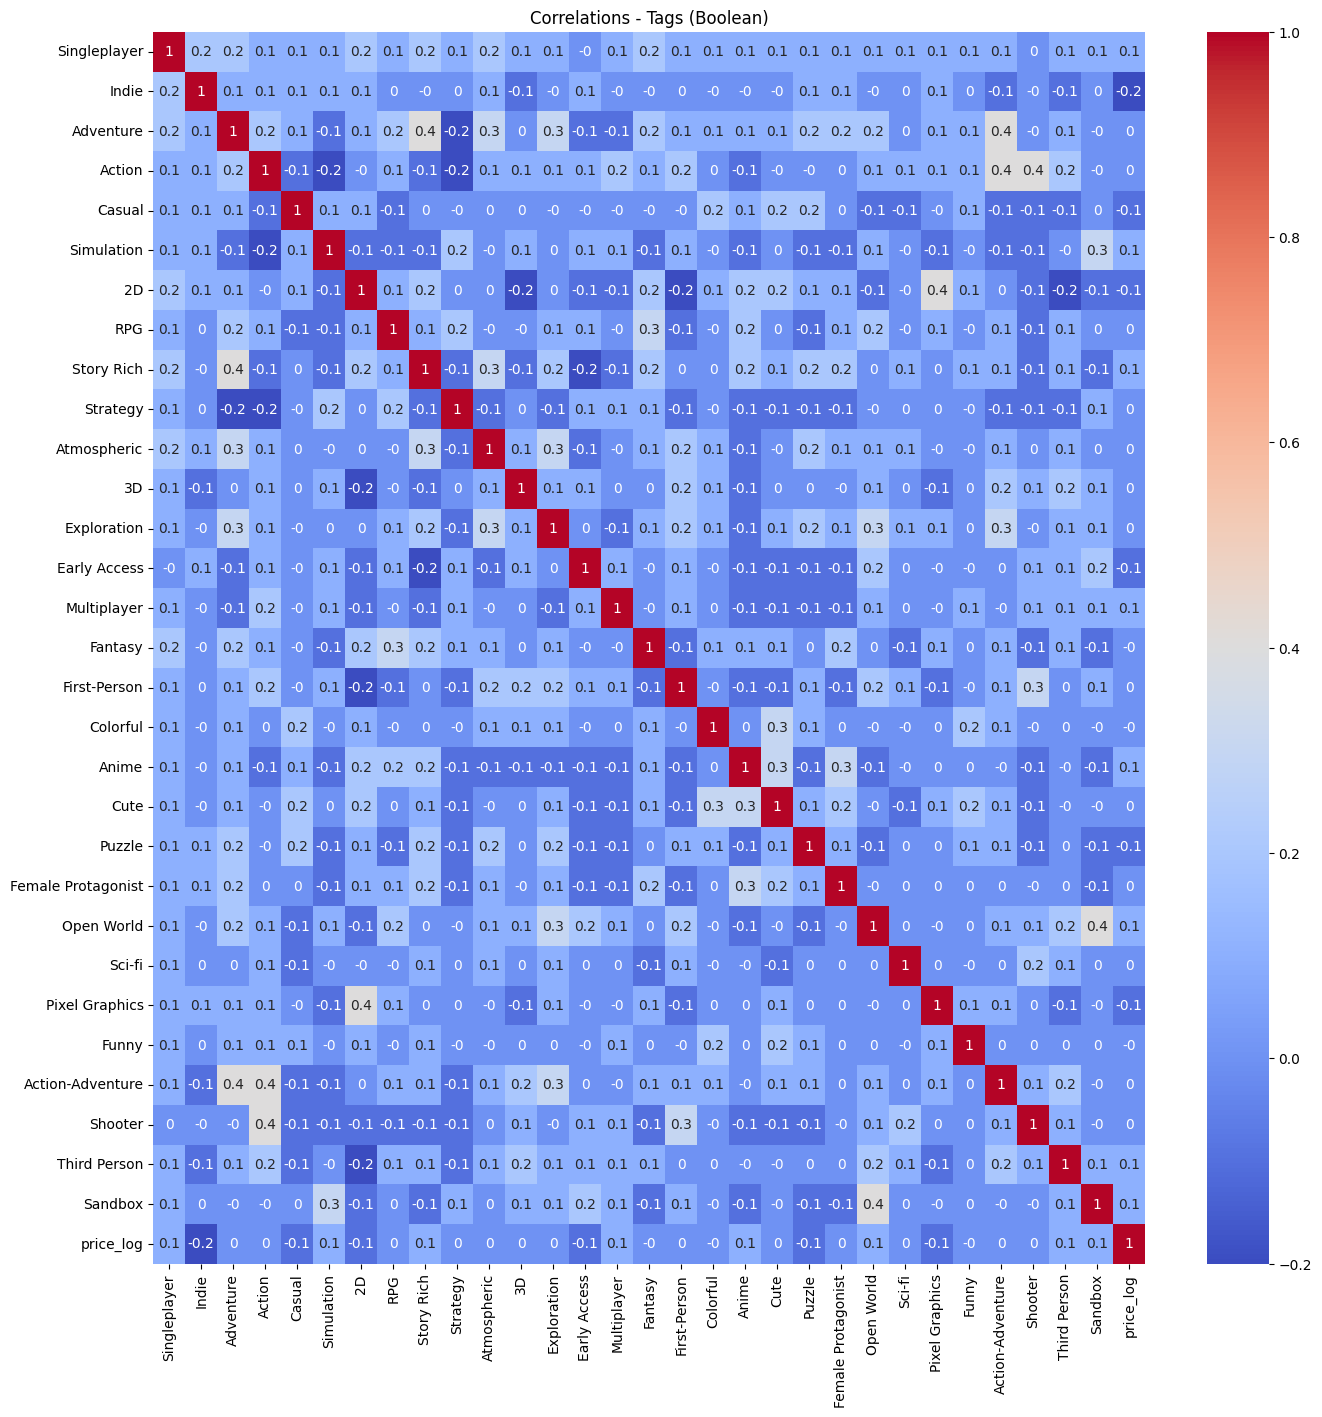

In [89]:
plt.figure(figsize = (16, 16))
sns.heatmap(round(pd.concat([tags_bool_df, mainline_df[target_features]], axis = 1).corr('spearman'),1), annot = True, cmap = "coolwarm")
plt.title('Correlations - Tags (Boolean)')
plt.show()

# <span style="color: Teal; font-weight: bold">EDA</span>

Look at the multidimensional relationships between the target and predictors

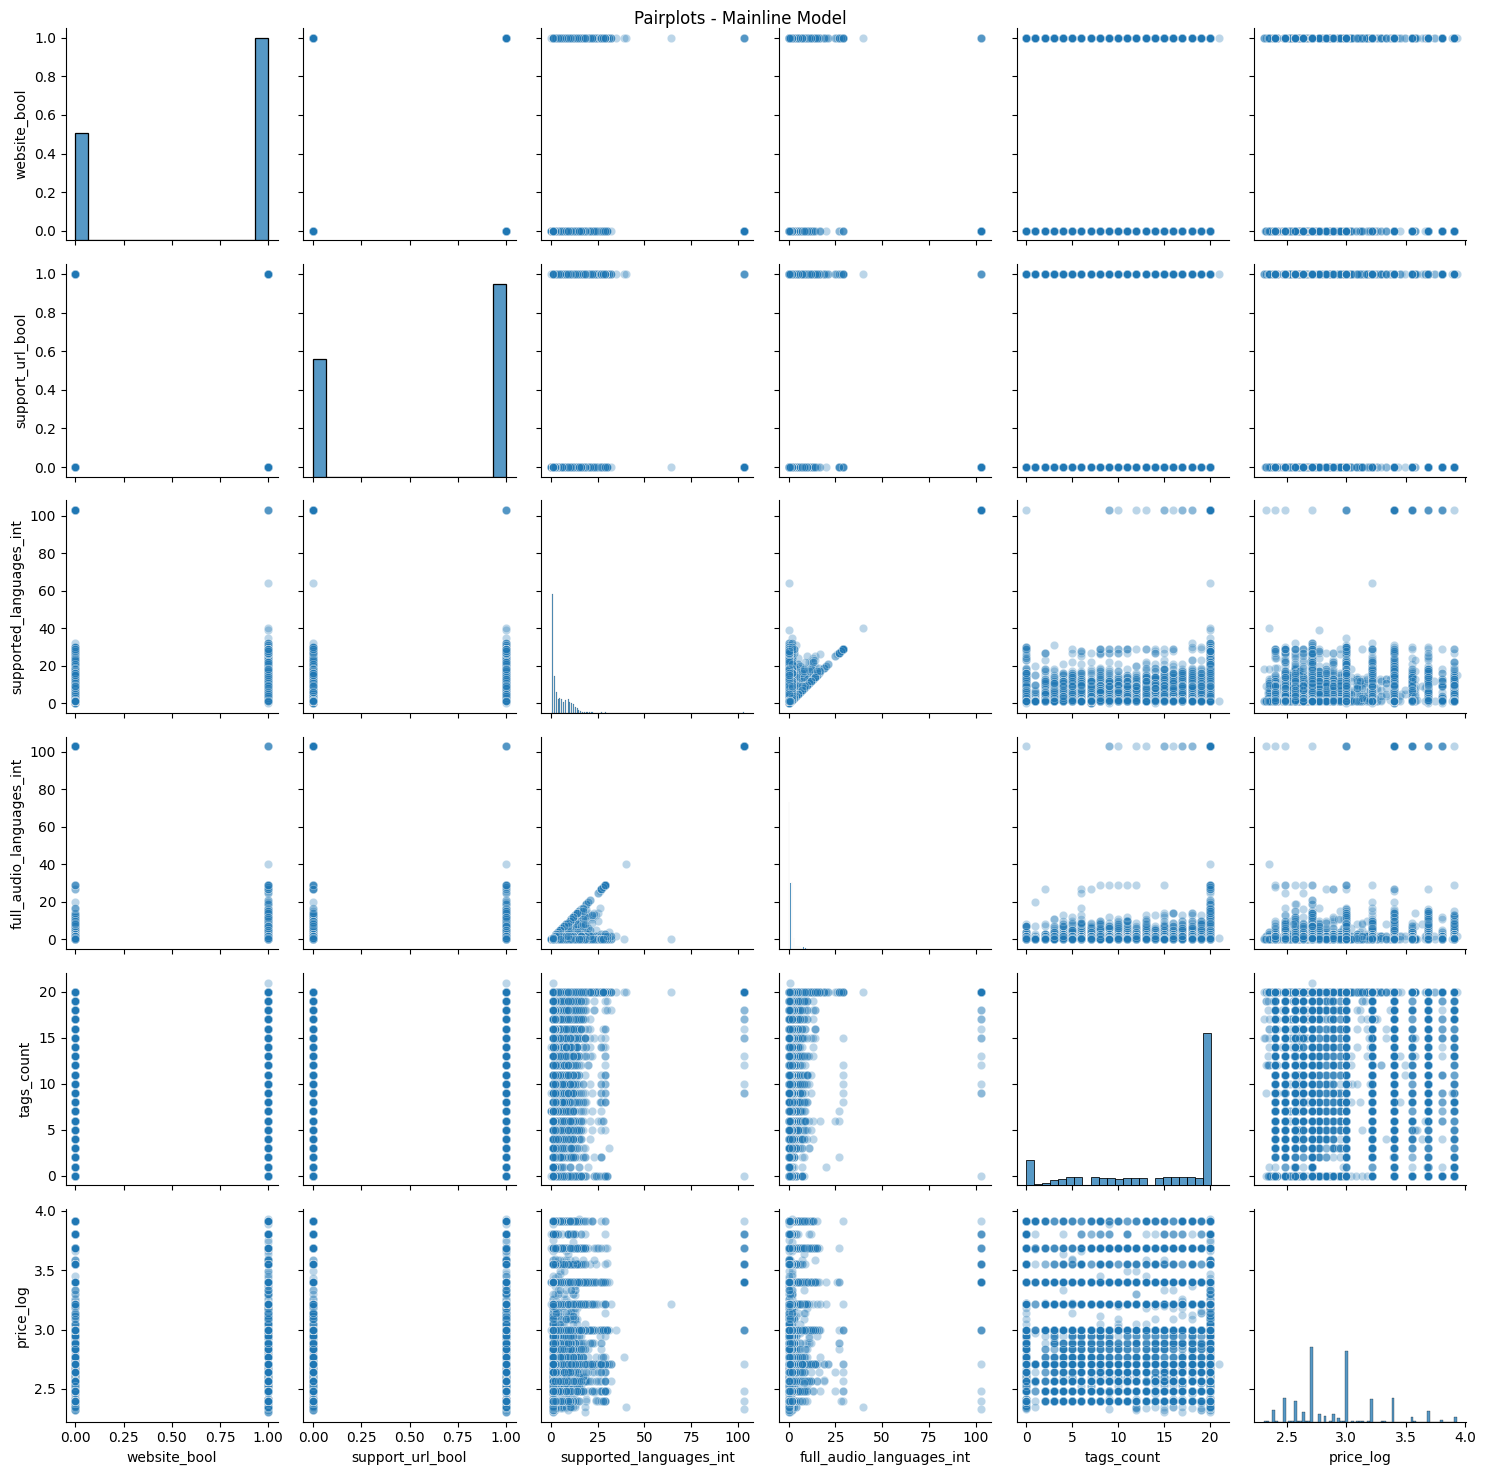

In [99]:
# Mainline model
sns.pairplot(mainline_df[mainline_model+target_features], plot_kws = {'alpha': 0.3})
plt.suptitle("Pairplots - Mainline Model")
plt.tight_layout()
plt.show()

In [104]:
# Categorical/Genres model
catgen_melt = pd.concat([catgen_df, mainline_df[target_features]], axis = 1).melt(id_vars = 'price_log', var_name = 'catgen', value_name = 'Category/Genre')
catgen_melt.head()

,price_log,catgen,Category/Genre
0,2.995232,categories_single-player,1
1,3.688629,categories_single-player,0
2,3.400864,categories_single-player,1
3,3.688629,categories_single-player,0
4,2.707383,categories_single-player,1


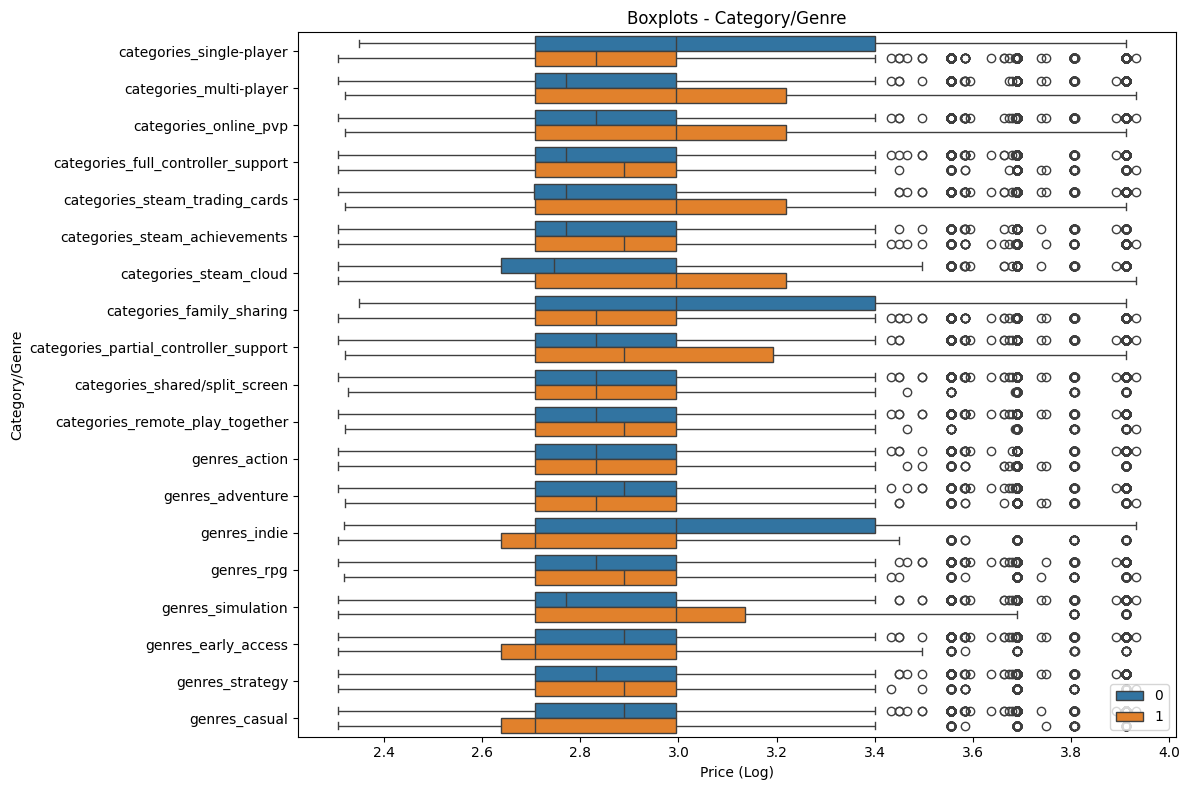

In [114]:
plt.figure(figsize = (12, 8))
sns.boxplot(data = catgen_melt, x='price_log', y='catgen', hue = 'Category/Genre')
plt.title('Boxplots - Category/Genre')
plt.ylabel('Category/Genre')
plt.xlabel('Price (Log)')
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

In [109]:
# Tags model
tags_bool_melt = pd.concat([tags_bool_df, mainline_df[target_features]], axis = 1).melt(id_vars = 'price_log', var_name = 'tags', value_name = 'Tags')
tags_bool_melt.head()

,price_log,tags,Tags
0,2.995232,Singleplayer,0
1,3.688629,Singleplayer,0
2,3.400864,Singleplayer,1
3,3.688629,Singleplayer,1
4,2.707383,Singleplayer,1


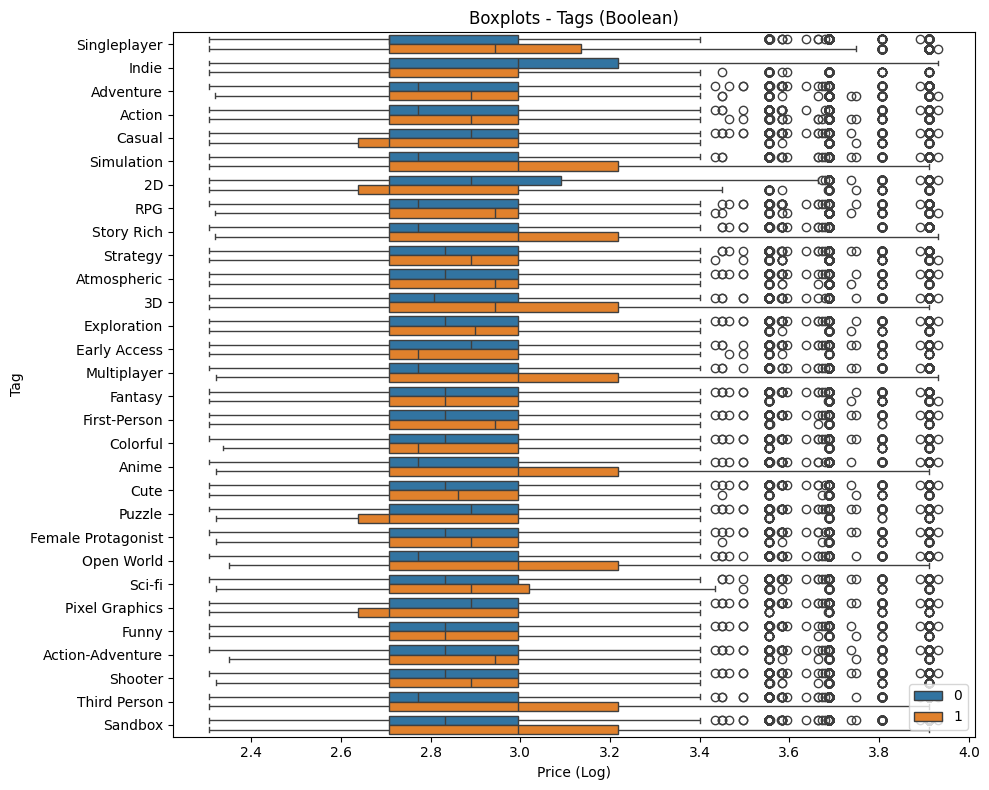

In [119]:
plt.figure(figsize = (10, 8))
sns.boxplot(data = tags_bool_melt, x='price_log', y='tags', hue = 'Tags')
plt.title('Boxplots - Tags (Boolean)')
plt.ylabel('Tag')
plt.xlabel('Price (Log)')
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

In [116]:
# Tags model
tags_num_melt = pd.concat([tags_bool_df, mainline_df[target_features]], axis = 1).melt(id_vars = 'price_log', var_name = 'tags', value_name = 'Tags')
tags_num_melt.head()

,price_log,tags,Tags
0,2.995232,Singleplayer,0
1,3.688629,Singleplayer,0
2,3.400864,Singleplayer,1
3,3.688629,Singleplayer,1
4,2.707383,Singleplayer,1


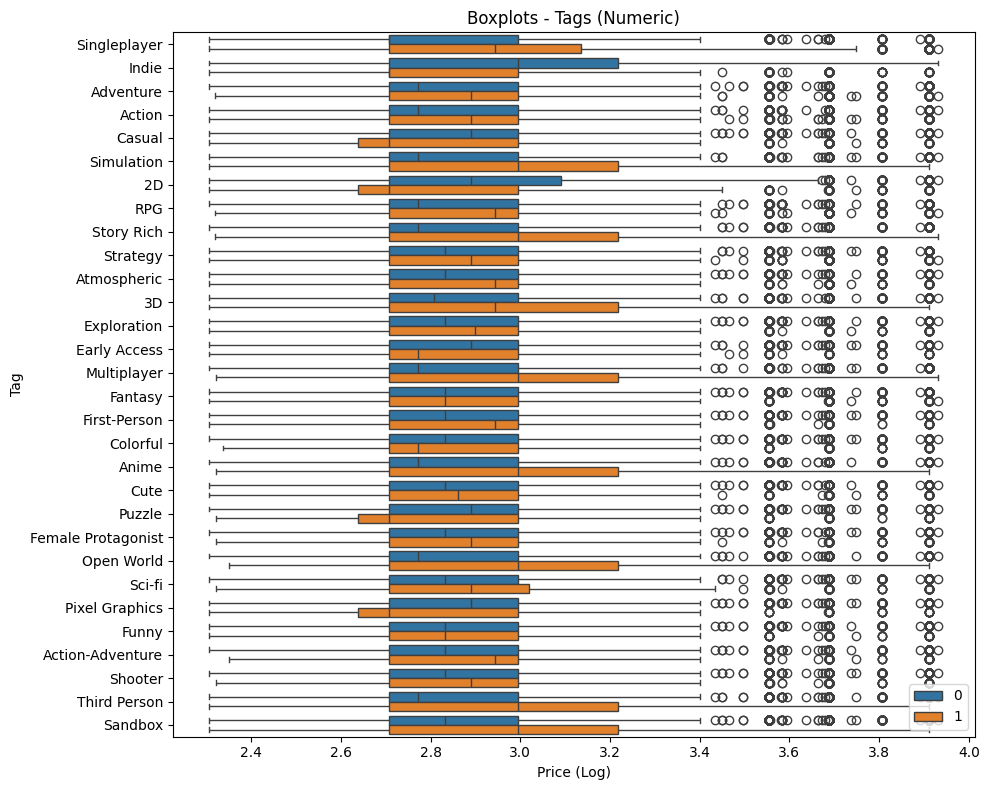

In [118]:
plt.figure(figsize = (10, 8))
sns.boxplot(data = tags_num_melt, x='price_log', y='tags', hue = 'Tags')
plt.title('Boxplots - Tags (Numeric)')
plt.ylabel('Tag')
plt.xlabel('Price (Log)')
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

# <span style="color: Teal; font-weight: bold">Save for Export</span>

In [127]:
#mainline_df.to_csv('data/model_mainline games.csv', index = True)
#catgen_df.to_csv('data/model_catgen.csv', index = True)
#tags_num_df.to_csv('data/model_tags_numeric.csv', index = True)
#tags_bool_df.to_csv('data/model_tags_bool.csv', index = True)